In [1]:
from google.colab import drive, html, auth, files
drive.mount('/content/gdrive')
import os

# os.mkdir('/content/gdrive/My Drive/crypto')

os.chdir('/content/gdrive/My Drive/crypto')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
!ls

Coinbase_BTCUSD_d.csv  df_feather  export.pkl  models  simple


In [0]:
import pandas as pd
import numpy as np
from fastai import *
from fastai.tabular import *

In [7]:
# df = pd.read_feather('./df_feather')
df = pd.read_csv('./Coinbase_BTCUSD_d.csv', header=1 )
df = df['Date Close'.split()]
df.rename(columns={'Close':'price'}, inplace=True)
df['prev'] = df.price.shift(-1)
add_datepart(df, 'Date')

,price,prev,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Elapsed
0,8289.00,8060.00,2019,9,39,27,4,270,False,False,False,False,False,False,1569542400
1,8060.00,8438.35,2019,9,39,26,3,269,False,False,False,False,False,False,1569456000
2,8438.35,8530.01,2019,9,39,25,2,268,False,False,False,False,False,False,1569369600
3,8530.01,9693.74,2019,9,39,24,1,267,False,False,False,False,False,False,1569283200
4,9693.74,10026.80,2019,9,39,23,0,266,False,False,False,False,False,False,1569196800
5,10026.80,9973.99,2019,9,38,22,6,265,False,False,False,False,False,False,1569110400
6,9973.99,10168.85,2019,9,38,21,5,264,False,False,False,False,False,False,1569024000
7,10168.85,10275.01,2019,9,38,20,4,263,False,False,False,False,False,False,1568937600
8,10275.01,10155.26,2019,9,38,19,3,262,False,False,False,False,False,False,1568851200
9,10155.26,10185.39,2019,9,38,18,2,261,False,False,False,False,False,False,1568764800


In [0]:
from fastai.tabular import add_datepart, TabularList, TabularModel

In [0]:
from fastai.tabular import Categorify, TabularList, TabularModel
from fastai.basic_train import Learner, load_learner, DatasetType
from fastai.data_block import FloatList
import torch.nn.functional as F

In [0]:
cat_names = ['Year', 'Month', 'Week', 'Day', 'Dayofweek', 'Dayofyear', 
             'Is_month_end', 'Is_month_start', 'Is_quarter_end',
             'Is_quarter_start', 'Is_year_end', 'Is_year_start',]
cont_names = ['Elapsed', 'prev']
procs = [FillMissing, Categorify, Normalize]

In [10]:
df.columns

Index(['price', 'prev', 'Year', 'Month', 'Week', 'Day', 'Dayofweek',
       'Dayofyear', 'Is_month_end', 'Is_month_start', 'Is_quarter_end',
       'Is_quarter_start', 'Is_year_end', 'Is_year_start', 'Elapsed'],
      dtype='object')

In [11]:
count = len(df)
val_idx = slice(count-100, count)
dep_var = 'price'
data = TabularList.from_df(df, cat_names, cont_names, procs).split_by_idx(val_idx).label_from_df(cols='price', label_cls=FloatList, log=True).databunch()
data

TabularDataBunch;

Train: LabelList (1750 items)
x: TabularList
Year 2019; Month 9; Week 39; Day 27; Dayofweek 4; Dayofyear 270; Is_month_end False; Is_month_start False; Is_quarter_end False; Is_quarter_start False; Is_year_end False; Is_year_start False; prev_na False; Elapsed 1.7452; prev 1.1139; ,Year 2019; Month 9; Week 39; Day 26; Dayofweek 3; Dayofyear 269; Is_month_end False; Is_month_start False; Is_quarter_end False; Is_quarter_start False; Is_year_end False; Is_year_start False; prev_na False; Elapsed 1.7432; prev 1.2096; ,Year 2019; Month 9; Week 39; Day 25; Dayofweek 2; Dayofyear 268; Is_month_end False; Is_month_start False; Is_quarter_end False; Is_quarter_start False; Is_year_end False; Is_year_start False; prev_na False; Elapsed 1.7413; prev 1.2328; ,Year 2019; Month 9; Week 39; Day 24; Dayofweek 1; Dayofyear 267; Is_month_end False; Is_month_start False; Is_quarter_end False; Is_quarter_start False; Is_year_end False; Is_year_start False; prev_na False; Elapsed 1.7393

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


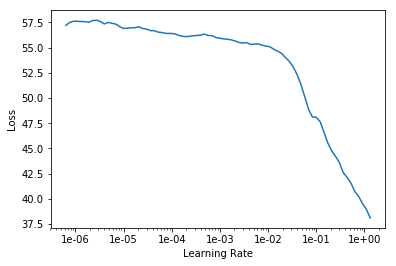

In [26]:

# Create deep learning model
learn = tabular_learner(data, layers=[300,100], emb_drop=0.03, metrics=rmse) #ps=[0.01, 0.01], 

# select the appropriate learning rate
learn.lr_find()

# we typically find the point where the slope is steepest
learn.recorder.plot()

In [27]:
learn.fit_one_cycle(30, max_lr =1e-02)

epoch,train_loss,valid_loss,root_mean_squared_error,time
0,54.027687,32.000355,5.654190,00:00
1,52.553913,41.072922,6.407701,00:00
2,48.312534,38.422462,6.198471,00:00
3,34.243465,6.250375,2.499994,00:00
4,19.279455,1.157904,1.075705,00:00
5,10.912451,0.140764,0.375119,00:00
6,6.252172,0.029098,0.169868,00:00
7,3.619231,0.040406,0.200070,00:00
8,2.127717,0.012880,0.113017,00:00
9,1.258796,0.017715,0.131801,00:00


In [28]:
learn.show_results()

Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,prev_na,Elapsed,prev,target,prediction
2015,3,11,10,1,69,False,False,False,False,False,False,False,-1.5313,-0.8516,5.67867,[5.739628]
2015,3,11,9,0,68,False,False,False,False,False,False,False,-1.5332,-0.8555,5.670674,[5.740341]
2015,3,10,8,6,67,False,False,False,False,False,False,False,-1.5352,-0.8552,5.6161165,[5.683369]
2015,3,10,7,5,66,False,False,False,False,False,False,False,-1.5372,-0.8558,5.621596,[5.719305]
2015,3,10,6,4,65,False,False,False,False,False,False,False,-1.5391,-0.8550,5.6127996,[5.68656]


In [0]:
learn.export('date_prev_btc_model.pkl')

In [45]:
from fastai.tabular import load_learner
infer = load_learner('.', file='date_prev_btc_model.pkl')
def pred_single(date, prev, learn=infer):
  df = pd.DataFrame(dict(Date=date, prev=prev), index=[0])
  add_datepart(df, 'Date')
  pred = learn.predict(df.iloc[0])
  print(pred)
  res = round(np.exp(pred[0].data.item()), 2)
  print(res)
  return res


pred_single('2019-09-26', 8438)
# df.loc[df.Date == '2019-09-26', 'Close']

(FloatItem [8.973128], tensor([8.9731]), tensor([8.9731]))
7888.24


7888.24

In [40]:
pred_single('2019-09-26', 8438)

(FloatItem [8.973128], tensor([8.9731]), tensor([8.9731]))
7888.24


7888.24

In [0]:
files.download('date_prev_btc_model.pkl')